# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.1 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [1]:
# Import common libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

%matplotlib inline

# Set a random seed for reproducible results
np.random.seed(24)

# Create data
X, y = datasets.make_moons(n_samples = 1000, shuffle = True, noise = 0.5, random_state = 0)

# Train - test dataset ratio: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 24)
# Train - validation dataset ratio: 75-25 from the previous 'train' dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 24)

# Finally, we have the following ratio:
# 60 for the training, 20 for the validation and 20 for the testing

# Data augmentation using polynomial features
pol_transform = sklearn.preprocessing.PolynomialFeatures(degree = 10)
X_train_new = pol_transform.fit_transform(X_train)
X_val_new = pol_transform.fit_transform(X_val)
X_test_new = pol_transform.fit_transform(X_test)

2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



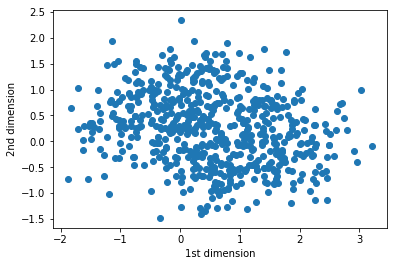

In [2]:
# Data visualisation of the first two dimensions
plt.plot(X_train_new[:, 1], X_train_new[:, 2], 'o')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.show()

3) Use a Decision Tree to classify the data (5 points)



In [3]:
from sklearn import tree

start = time.time()

# Decision tree classification
dtc = tree.DecisionTreeClassifier(random_state = 24) # Gini impurity by default
dtc = dtc.fit(X_train_new, y_train)

# Prediction of the label of the test dataset
test_pred = dtc.predict(X_test_new)

duration = time.time() - start
print('It takes {0:.6f} seconds to perform the decision tree classification with a Gini impurity.'.format(duration))

It takes 0.037726 seconds to perform the decision tree classification with a Gini impurity.


4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

In [4]:
start = time.time()

# Decision tree classification with Information Gain
dtc_ig = tree.DecisionTreeClassifier('entropy', random_state = 24)
dtc_ig = dtc_ig.fit(X_train_new, y_train)

test_pred_ig = dtc_ig.predict(X_test_new)

duration = time.time() - start
print('It takes {0:.6f} seconds to perform the decision tree classification with information gain.'.format(duration))

It takes 0.087666 seconds to perform the decision tree classification with information gain.


In [5]:
# Performance comparison
print('Accuracy with Gini Impurity:', metrics.accuracy_score(y_test, test_pred))
print('Accuracy with Information Gain:', metrics.accuracy_score(y_test, test_pred_ig))

Accuracy with Gini Impurity: 0.755
Accuracy with Information Gain: 0.8


The Gini impurity is quicker than the information gain for the decision tree classification. Indeed, the formula for the Gini impurity is less complex than the one of the Information Gain; the computational complexity can thus explain the difference in time. Moreover, the accuracy is slightly better with the Information Gain. Overall, the information gain performs better since the difference in time is small.

The main difference between them is that after a split, the Gini impurity shows the level of impurity in each class whereas the information gain shows how purer they became.

5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



It takes 0.013335 seconds to perform a decision tree classifier with 1 trees.
It takes 0.023906 seconds to perform a decision tree classifier with 2 trees.
It takes 0.031208 seconds to perform a decision tree classifier with 3 trees.
It takes 0.039183 seconds to perform a decision tree classifier with 4 trees.
It takes 0.046796 seconds to perform a decision tree classifier with 5 trees.
It takes 0.052585 seconds to perform a decision tree classifier with 6 trees.
It takes 0.058233 seconds to perform a decision tree classifier with 7 trees.
It takes 0.063046 seconds to perform a decision tree classifier with 8 trees.
It takes 0.067507 seconds to perform a decision tree classifier with 9 trees.
It takes 0.071476 seconds to perform a decision tree classifier with 10 trees.
It takes 0.075428 seconds to perform a decision tree classifier with 11 trees.
It takes 0.075919 seconds to perform a decision tree classifier with 12 trees.
It takes 0.077511 seconds to perform a decision tree classifi

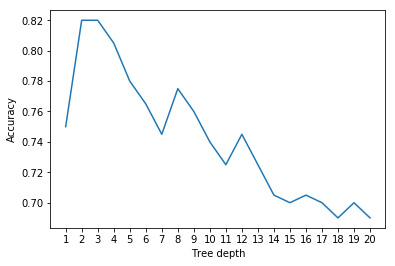

In [6]:
# Keep the results of the accuracy for each value of tree depth
tree_depth_accuracy = np.zeros((20, 2))

for i in range(1, 21):
    start = time.time()
    
    # The information gain method is better
    dtc_ig_i = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 24)
    dtc_ig_i = dtc_ig_i.fit(X_train_new, y_train)
    
    # We tune a hyperparameter, so we use the validation dataset
    val_pred_ig_i = dtc_ig_i.predict(X_val_new)
    # Store the results
    tree_depth_accuracy[i - 1] = [i, metrics.accuracy_score(y_val, val_pred_ig_i)] 
    
    duration = time.time() - start
    print('It takes {0:.6f} seconds to perform a decision tree classifier with {1} trees.'.format(duration, i))

# Plots the accuracy versus a hyparameter to tune
def plot_param_accuracy(result_data, name_param, unit = 1):
    plt.plot(result_data[:, 0], result_data[:, 1])
    plt.xlabel(name_param)
    plt.ylabel('Accuracy')
    if unit == 1:
        plt.xticks(result_data[:, 0])
    else:
        plt.xticks(np.arange(min(result_data[:, 0]) - 1, max(result_data[:, 0]) + 1, unit))
    plt.show()

# Plots the accuracy versus the tree depth
plot_param_accuracy(tree_depth_accuracy, 'Tree depth')

6) How does the depth of a tree affect performance and computational burden? (1 points)



From the figure above, we can see that the accuracy tends to decrease overall with the tree depth, while it naturally requires more time to compute the classifier with more trees. We can however see that one tree is not enough but two or three trees seem to be the best value for the tree depth.

7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



In [7]:
# Bootstrap classifier
from sklearn import ensemble

# Some default values for the Bootstrap classifier
bsc = ensemble.BaggingClassifier(base_estimator = None, n_estimators = 10, max_samples = 1.0, 
                  bootstrap = True, random_state = 24) # Decision tree by default
bsc = bsc.fit(X_train_new, y_train)

test_pred_bsc = bsc.predict(X_test_new)

print('Accuracy with default values:', metrics.accuracy_score(y_test, test_pred_bsc))

Accuracy with default values: 0.795


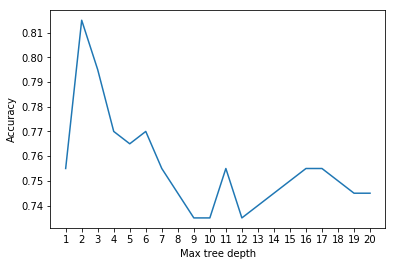

The best tree depth is 2


In [8]:
# We will tune hyperparameters below, so we will use the validation dataset. 
# We will choose the value of the hyperparameters based on the accuracy on the validation set.

# Tree depth
bsc_estim_accuracy_depth = np.zeros((20, 2))
for i in range(1, 21):
    # Base estimator: a decision tree with a depth of i
    bsc_estim = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion = 'entropy', 
                                                                                        max_depth = i, random_state = 24), 
                                           random_state = 24)
    bsc_estim = bsc_estim.fit(X_train_new, y_train)
    
    bsc_estim_accuracy_depth[i - 1] = [i, bsc_estim.score(X_val_new, y_val)]

# The value of the accuracy for each tree depth
#print(bsc_estim_accuracy_depth)

plot_param_accuracy(bsc_estim_accuracy_depth, 'Max tree depth')

# The best value for the hyperparameter
print('The best tree depth is', np.argmax(bsc_estim_accuracy_depth[:, 1]) + 1)

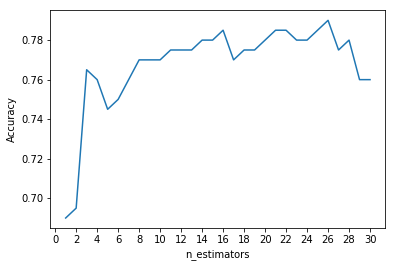

The best number of estimators is 26


In [9]:
# Number of estimators
bsc_estim_accuracy_estimators = np.zeros((30, 2))
for i in range(1, 31):
    bsc_estim = ensemble.BaggingClassifier(base_estimator = None, n_estimators = i, random_state = 24)
    bsc_estim = bsc_estim.fit(X_train_new, y_train)
    
    bsc_estim_accuracy_estimators[i - 1] = [i, bsc_estim.score(X_val_new, y_val)]


#print(bsc_estim_accuracy_estimators)
plot_param_accuracy(bsc_estim_accuracy_estimators, 'n_estimators', 2)

# The best value for the hyperparameter
print('The best number of estimators is', np.argmax(bsc_estim_accuracy_estimators[:, 1]) + 1)

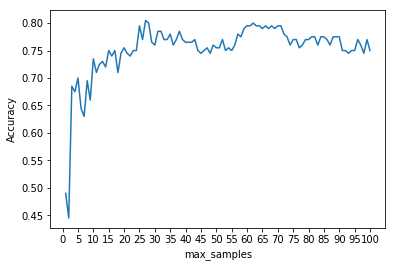

The best maximum number of samples is 27


In [10]:
# Maximum number of samples
bsc_estim_accuracy_samples = np.zeros((100, 2))
for i in range(1, 101):
    bsc_estim = ensemble.BaggingClassifier(base_estimator = None, max_samples = i, random_state = 24)
    bsc_estim = bsc_estim.fit(X_train_new, y_train)
    
    bsc_estim_accuracy_samples[i - 1] = [i, bsc_estim.score(X_val_new, y_val)]

#print(bsc_estim_accuracy_samples)
plot_param_accuracy(bsc_estim_accuracy_samples, 'max_samples', 5)

# The best value for the hyperparameter
print('The best maximum number of samples is', np.argmax(bsc_estim_accuracy_samples[:, 1]) + 1)

[[1.    0.77 ]
 [0.    0.715]]


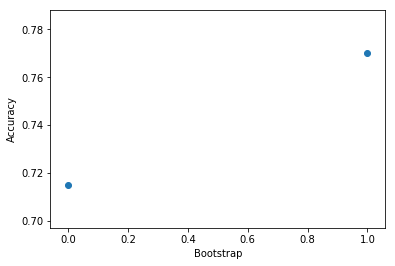

It is better to use replacement when samples are drawn.


In [11]:
# Bootstrap
bsc_estim_accuracy_bootstrap = np.zeros((2, 2))
j = 0
for i in [True, False]:
    bsc_estim = ensemble.BaggingClassifier(base_estimator = None, random_state = 24, bootstrap = i)
    bsc_estim = bsc_estim.fit(X_train_new, y_train)
    
    bsc_estim_accuracy_bootstrap[j] = [i, bsc_estim.score(X_val_new, y_val)]
    j += 1


print(bsc_estim_accuracy_bootstrap)

plt.scatter(bsc_estim_accuracy_bootstrap[:, 0], bsc_estim_accuracy_bootstrap[:, 1])
plt.xlabel('Bootstrap')
plt.ylabel('Accuracy')
plt.show()


# The best value for the hyperparameter
print('It is better to use replacement when samples are drawn.')

8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 

We use bootstrapping when we create our datasets to have a number of diverse subsamples to train our model on. The idea is to have several weak learners combined to have a "stronger" learner.

To have better results, it is better to use replacement according to the previous graph. Indeed, by drawing samples with replacement we have an independent random set of subsamples.

9)  Use a Decision Forest to classify the new dataset (4 points)



In [12]:
# Random Forest classifier
rfc = ensemble.RandomForestClassifier(random_state = 24)
rfc = rfc.fit(X_train_new, y_train)

test_pred_rfc = rfc.predict(X_test_new)

print('Accuracy with default values:', rfc.score(X_test_new, y_test))

Accuracy with default values: 0.795


/vol/lab/course/416/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



It takes 0.006749 seconds to perform a decision forest classifier with 1 trees.
It takes 0.040860 seconds to perform a decision forest classifier with 11 trees.
It takes 0.074889 seconds to perform a decision forest classifier with 21 trees.
It takes 0.110296 seconds to perform a decision forest classifier with 31 trees.
It takes 0.145766 seconds to perform a decision forest classifier with 41 trees.
It takes 0.180693 seconds to perform a decision forest classifier with 51 trees.
It takes 0.217109 seconds to perform a decision forest classifier with 61 trees.
It takes 0.251966 seconds to perform a decision forest classifier with 71 trees.
It takes 0.288386 seconds to perform a decision forest classifier with 81 trees.
It takes 0.323648 seconds to perform a decision forest classifier with 91 trees.


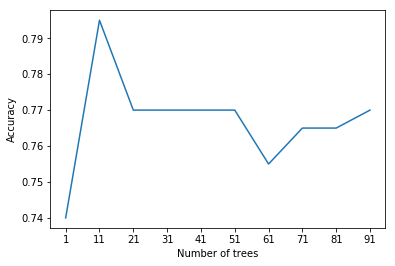

The best number of trees is 11


In [13]:
# We are going to tune a hyperparameter so we will use the validation dataset

# Number of trees
rfc_i_accuracy = np.zeros((10, 2))
j = 1
for i in range(1, 100, 10):
    start = time.time()
    
    rfc_i = ensemble.RandomForestClassifier(n_estimators = i, random_state = 24)
    rfc_i = rfc_i.fit(X_train_new, y_train)

    rfc_i_accuracy[j - 1] = [i, rfc_i.score(X_val_new, y_val)]
    
    duration = time.time() - start
    print('It takes {0:.6f} seconds to perform a decision forest classifier with {1} trees.'.format(duration, i))
    
    j += 1

#print(rfc_i_accuracy)
plot_param_accuracy(rfc_i_accuracy, 'Number of trees')

# The best value for the hyperparameter
n_tree_best = int(rfc_i_accuracy[np.argmax(rfc_i_accuracy[:, 1]), 0])
print('The best number of trees is', n_tree_best)

11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



It takes 0.026098 seconds to perform a decision forest classifier with 11 trees with a maximum depth of 1.
It takes 0.024189 seconds to perform a decision forest classifier with 11 trees with a maximum depth of 2.
It takes 0.026926 seconds to perform a decision forest classifier with 11 trees with a maximum depth of 3.
It takes 0.030053 seconds to perform a decision forest classifier with 11 trees with a maximum depth of 4.
It takes 0.032650 seconds to perform a decision forest classifier with 11 trees with a maximum depth of 5.
It takes 0.034902 seconds to perform a decision forest classifier with 11 trees with a maximum depth of 6.
It takes 0.036741 seconds to perform a decision forest classifier with 11 trees with a maximum depth of 7.
It takes 0.038485 seconds to perform a decision forest classifier with 11 trees with a maximum depth of 8.
It takes 0.038592 seconds to perform a decision forest classifier with 11 trees with a maximum depth of 9.
It takes 0.039466 seconds to perform 

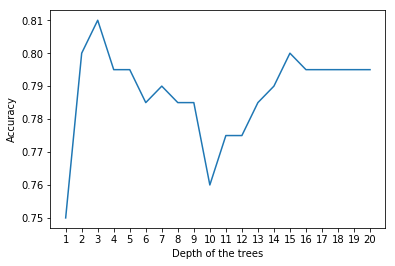

The best tree depth is 3


In [14]:
# Tree depth
rfc_tree_accuracy = np.zeros((20, 2))
for i in range(1, 21):
    start = time.time()
    
    rfc_tree = ensemble.RandomForestClassifier(n_estimators = n_tree_best, max_depth = i, random_state = 24)
    rfc_tree = rfc_tree.fit(X_train_new, y_train)

    rfc_tree_accuracy[i - 1] = [i, rfc_tree.score(X_val_new, y_val)]
    
    duration = time.time() - start
    print('It takes {0:.6f} seconds to perform a decision forest classifier with {1} trees with a maximum depth of {2}.'.format(duration, n_tree_best, i))

#print(rfc_tree_accuracy)
plot_param_accuracy(rfc_tree_accuracy, 'Depth of the trees')

# The best value for the hyperparameter
print('The best tree depth is', np.argmax(rfc_tree_accuracy[:, 1]) + 1)

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

For the number of trees, the accuracy is not necessarily better if there are more trees in the model, even though the complexity (time and computation) increases with it. We have indeed seen a peak with a small number of trees: 11 trees seem to be the best number in our case.

For the maximum depth of the tree, the relation is more complex, a deeper tree is neither better nor worse for the accuracy: the worst cases are random forests with one or 10 trees. We can also see that the computation is not automatically longer with deeper trees and after a given depth, the accuracy does not improve.

13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

In [15]:
from sklearn.manifold.t_sne import TSNE
from sklearn.neighbors.classification import KNeighborsClassifier

# Given a model and a labelled data, plots the decision boundary (from the tutorial 2).
def plot_decision_boundary(model, X, y):
    Y_pred = model.predict(X)
    X_Train_embedded = TSNE(n_components = 2, random_state = 24).fit_transform(X)
    
    # Creates a meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:, 0]), np.max(X_Train_embedded[:, 0])
    X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:, 1]), np.max(X_Train_embedded[:, 1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # Approximates Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors = 1).fit(X_Train_embedded, Y_pred) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    # Plots the points with the decision boundaries
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X_Train_embedded[:, 0], X_Train_embedded[:,1], c = y)
    plt.show()

Classification split with the Decision Tree


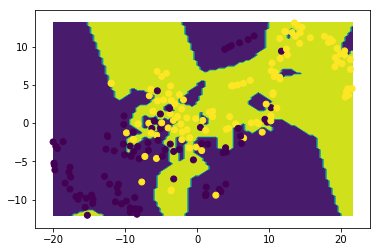

Classification split with the Decision Forest


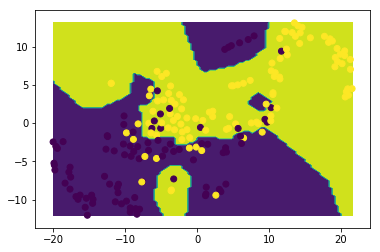

In [16]:
# Decision tree with the information gain
print('Classification split with the Decision Tree')
plot_decision_boundary(dtc_ig, X_test_new, y_test)

# Best random forest classifier according to the previous questions
rfc = ensemble.RandomForestClassifier(n_estimators = n_tree_best, max_depth = 3, random_state = 24)
rfc = rfc.fit(X_train_new, y_train)
print('Classification split with the Decision Forest')
plot_decision_boundary(rfc, X_test_new, y_test)

## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [17]:
# Load the data
import numpy as np
import pandas as pd

data_dir = '/vol/lab/course/416/data/fashion/'

df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis = 1).as_matrix().astype(np.uint8)
y_train = df_train['label'].as_matrix().astype(np.uint8)
x_test = df_test.drop('label', axis = 1).as_matrix().astype(np.uint8)
y_test = df_test['label'].as_matrix().astype(np.uint8)

/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [18]:
# Split the training images into a training dataset and a validation dataset
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 1.0/6, random_state = 24)

In [19]:
# Dataset Visualisation and Reduction: only keep T-shirts and ankle boots
df_train_red = df_train.loc[df_train['label'].isin([0, 9])]
df_test_red = df_test.loc[df_test['label'].isin([0, 9])]

x_train_red = df_train_red.drop('label', axis = 1).as_matrix().astype(np.uint8)
y_train_red = df_train_red['label'].as_matrix().astype(np.uint8)
x_test_red = df_test_red.drop('label', axis = 1).as_matrix().astype(np.uint8)
y_test_red = df_test_red['label'].as_matrix().astype(np.uint8)

# Split the training images into a training dataset and a validation dataset
x_train_red, x_val_red, y_train_red, y_val_red = train_test_split(x_train_red, y_train_red, test_size = 1.0/6, random_state = 24)

/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


1) Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!

In [20]:
# Decision Forest classification
start = time.time()

rfc_tree_red = ensemble.RandomForestClassifier(random_state = 24) # Default values
rfc_tree_red = rfc_tree_red.fit(x_train_red, y_train_red)

test_pred_rfc_red = rfc_tree_red.predict(x_test_red)
duration = time.time() - start
print('It takes {0:.6f} seconds to perform a decision forest classifier.'.format(duration))

print('Accuracy with default values:', rfc_tree_red.score(x_test_red, y_test_red))

/vol/lab/course/416/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


It takes 0.528972 seconds to perform a decision forest classifier.
Accuracy with default values: 0.999


In [21]:
# Tuning: use of the validation dataset to find the value of the number of trees and of the maximum depth

# Initialise the values
best_acc = (0, 0, 0) 

# Loop to find the best values
for n_tree in np.arange(1, 20, 5):
    for depth in np.arange(1, 21, 2):
        rfc_tree_red = ensemble.RandomForestClassifier(n_estimators = n_tree, max_depth = depth, random_state = 24)
        rfc_tree_red = rfc_tree_red.fit(x_train_red, y_train_red)
        
        acc = rfc_tree_red.score(x_val_red, y_val_red)
        print ('Number of trees = {}, maximum depth = {}, accuracy = {}'.format(n_tree, depth, acc))
        if best_acc[2] < acc:
            best_acc = (n_tree, depth, acc)

print('Best hyperparameters and accuracy: ', best_acc)

Number of trees = 1, maximum depth = 1, accuracy = 0.9655
Number of trees = 1, maximum depth = 3, accuracy = 0.996
Number of trees = 1, maximum depth = 5, accuracy = 0.999
Number of trees = 1, maximum depth = 7, accuracy = 0.998
Number of trees = 1, maximum depth = 9, accuracy = 0.998
Number of trees = 1, maximum depth = 11, accuracy = 0.998
Number of trees = 1, maximum depth = 13, accuracy = 0.998
Number of trees = 1, maximum depth = 15, accuracy = 0.998
Number of trees = 1, maximum depth = 17, accuracy = 0.998
Number of trees = 1, maximum depth = 19, accuracy = 0.998
Number of trees = 6, maximum depth = 1, accuracy = 0.998
Number of trees = 6, maximum depth = 3, accuracy = 0.9995
Number of trees = 6, maximum depth = 5, accuracy = 1.0
Number of trees = 6, maximum depth = 7, accuracy = 0.9995
Number of trees = 6, maximum depth = 9, accuracy = 0.9995
Number of trees = 6, maximum depth = 11, accuracy = 0.9995
Number of trees = 6, maximum depth = 13, accuracy = 0.9995
Number of trees = 6,

We can see from the tuning above that there are several sets of hyperparameters to obtain an accuracy of 1.0 for the validation dataset and overall the accuracy is very high (more than 0.9). Now, let us test our decision forest on the test dataset.

In [22]:
# Best hyperparameters
best_n_tree = best_acc[0]
best_max_depth = best_acc[1]

start = time.time()
best_rfc_tree_red = ensemble.RandomForestClassifier(n_estimators = best_n_tree, max_depth = best_max_depth, random_state = 24)
best_rfc_tree_red = best_rfc_tree_red.fit(x_train_red, y_train_red)
test_rfc_tree_red = best_rfc_tree_red.predict(x_test_red)

duration = time.time() - start
print('It takes {0:.6f} seconds to perform a decision forest classifier with {1} trees with a maximum depth of {2}.'.format(duration, best_n_tree, best_max_depth))

acc_rfc_tree_red = best_rfc_tree_red.score(x_test_red, y_test_red)
print('Accuracy of the decision forest on the test dataset:', acc_rfc_tree_red)

It takes 0.286366 seconds to perform a decision forest classifier with 6 trees with a maximum depth of 5.
Accuracy of the decision forest on the test dataset: 0.999


We quickly obtained a very high accuracy, similar to the one obtained with the default values of the hyperparameters. We can explain this result with the fact that there are only two classes which are also quite distinct; T-shirts and boots are quite different. Even a "weak" classifier can thus achieve great results.

2) Train and compare an Adaboost classifier with a decision tree

In [23]:
# Adaboost Classifier
start = time.time()

adac_red = ensemble.AdaBoostClassifier(random_state = 24) # Default values; the base estimator is a decision tree
adac_red = adac_red.fit(x_train_red, y_train_red)

test_pred_adac_red = adac_red.predict(x_test_red)
duration = time.time() - start
print('It takes {0:.6f} seconds to perform an Adaboost classifier.'.format(duration))

print('Accuracy with default values:', adac_red.score(x_test_red, y_test_red))

It takes 19.877506 seconds to perform an Adaboost classifier.
Accuracy with default values: 0.9995


With the default values of the Adaboost classifier, we have a slightly better result than the random forest in terms of accuracy, but the required time is much longer.

3) Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity

In [61]:
# Tuning: use of the validation dataset to find the value of the number of trees and of the maximum depth

# Initialise the values
best_acc_ada = (0, 0, 0) 

# Loop to find the best values
for n_tree in np.arange(1, 22, 7):
    for depth in np.arange(1, 21, 2):
        adac_red = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion = 'entropy', 
                                                                                            max_depth = depth, random_state = 24), 
                                               n_estimators = n_tree, random_state = 24) 
        adac_red = adac_red.fit(x_train_red, y_train_red)
        
        ada_acc = adac_red.score(x_val_red, y_val_red)
        print ('Number of trees = {}, maximum depth = {}, accuracy = {}'.format(n_tree, depth, ada_acc))
        if best_acc_ada[2] < ada_acc:
            best_acc_ada = (n_tree, depth, ada_acc)

print('Best hyperparameters and accuracy:', best_acc_ada)

Number of trees = 1, maximum depth = 1, accuracy = 0.9875
Number of trees = 1, maximum depth = 3, accuracy = 0.997
Number of trees = 1, maximum depth = 5, accuracy = 0.9975
Number of trees = 1, maximum depth = 7, accuracy = 0.9975
Number of trees = 1, maximum depth = 9, accuracy = 0.9975
Number of trees = 1, maximum depth = 11, accuracy = 0.9975
Number of trees = 1, maximum depth = 13, accuracy = 0.9975
Number of trees = 1, maximum depth = 15, accuracy = 0.9975
Number of trees = 1, maximum depth = 17, accuracy = 0.9975
Number of trees = 1, maximum depth = 19, accuracy = 0.9975
Number of trees = 8, maximum depth = 1, accuracy = 0.999
Number of trees = 8, maximum depth = 3, accuracy = 0.999
Number of trees = 8, maximum depth = 5, accuracy = 0.9975
Number of trees = 8, maximum depth = 7, accuracy = 0.9975
Number of trees = 8, maximum depth = 9, accuracy = 0.9975
Number of trees = 8, maximum depth = 11, accuracy = 0.9975
Number of trees = 8, maximum depth = 13, accuracy = 0.9975
Number of 

In [63]:
# Best hyperparameters
best_n_tree_ada = best_acc_ada[0]
best_max_depth_ada = best_acc_ada[1]

start = time.time()
best_adac_red = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion = 'entropy', 
                                                                                         max_depth = best_max_depth_ada, 
                                                                                         random_state = 24), 
                                               n_estimators = best_n_tree_ada, random_state = 24) 
best_adac_red = best_adac_red.fit(x_train_red, y_train_red)
test_adac_red = best_adac_red.predict(x_test_red)

duration = time.time() - start
print('It takes {0:.6f} seconds to perform an Adaboost algorithm with {1} trees with a maximum depth of {2}.'.format(duration, best_n_tree_ada, best_max_depth_ada))

best_ada_acc = best_adac_red.score(x_test_red, y_test_red)
print('Accuracy of Adaboost on the test dataset:', best_ada_acc)

It takes 6.492794 seconds to perform an Adaboost algorithm with 15 trees with a maximum depth of 1.
Accuracy of Adaboost on the test dataset: 0.9985


We can see that we also had a set of hyperparameters giving an accuracy of 1 on the validation set and overall the accuracy is over 0.98. However, on the test dataset, the model did worse than with the default parameters or the random forest: we have here an overfitting of the model.

When it comes to the complexity, we can notice that this Adaboost algorithm is much quicker than with the default parameters but still longer than the decision forest.

4) Train a Decision Forest for all classes and also compare the performance with another ensemble algorithm of your choice

In [64]:
# Decision Forest classification
start = time.time()

rfc_tree = ensemble.RandomForestClassifier(random_state = 24) # Default values
rfc_tree = rfc_tree.fit(x_train, y_train)

test_pred_rfc = rfc_tree_red.predict(x_test)
duration = time.time() - start
print('It takes {0:.6f} seconds to perform a decision forest classifier.'.format(duration))

print('Accuracy with default values:', rfc_tree.score(x_test, y_test))

/vol/lab/course/416/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


It takes 9.448188 seconds to perform a decision forest classifier.
Accuracy with default values: 0.8539


In [69]:
# Tuning: use of the validation dataset to find the value of the number of trees and of the maximum depth

# Initialise the values
best_acc = (0, 0, 0) 

# Loop to find the best values
for n_tree in np.arange(1, 32, 5):
    for depth in np.arange(1, 31, 2):
        rfc_tree = ensemble.RandomForestClassifier(n_estimators = n_tree, max_depth = depth, random_state = 24)
        rfc_tree = rfc_tree.fit(x_train, y_train)
        
        acc = rfc_tree.score(x_val, y_val)
        print ('Number of trees = {}, maximum depth = {}, accuracy = {}'.format(n_tree, depth, acc))
        if best_acc[2] < acc:
            best_acc = (n_tree, depth, acc)

print('Best hyperparameters and accuracy:', best_acc)

Number of trees = 1, maximum depth = 1, accuracy = 0.197
Number of trees = 1, maximum depth = 3, accuracy = 0.4796
Number of trees = 1, maximum depth = 5, accuracy = 0.6877
Number of trees = 1, maximum depth = 7, accuracy = 0.72
Number of trees = 1, maximum depth = 9, accuracy = 0.7808
Number of trees = 1, maximum depth = 11, accuracy = 0.7893
Number of trees = 1, maximum depth = 13, accuracy = 0.7867
Number of trees = 1, maximum depth = 15, accuracy = 0.7809
Number of trees = 1, maximum depth = 17, accuracy = 0.7778
Number of trees = 1, maximum depth = 19, accuracy = 0.7775
Number of trees = 1, maximum depth = 21, accuracy = 0.7733
Number of trees = 1, maximum depth = 23, accuracy = 0.7754
Number of trees = 1, maximum depth = 25, accuracy = 0.7678
Number of trees = 1, maximum depth = 27, accuracy = 0.7716
Number of trees = 1, maximum depth = 29, accuracy = 0.7751
Number of trees = 6, maximum depth = 1, accuracy = 0.2449
Number of trees = 6, maximum depth = 3, accuracy = 0.687
Number o

In [70]:
# Best hyperparameters
best_n_tree = best_acc[0]
best_max_depth = best_acc[1]

start = time.time()
best_rfc_tree = ensemble.RandomForestClassifier(n_estimators = best_n_tree, max_depth = best_max_depth, random_state = 24)
best_rfc_tree = best_rfc_tree.fit(x_train, y_train)
test_rfc_tree = best_rfc_tree.predict(x_test)

duration = time.time() - start
print('It takes {0:.6f} seconds to perform a decision forest classifier with {1} trees with a maximum depth of {2}.'.format(duration, best_n_tree, best_max_depth))

acc_rfc_tree = best_rfc_tree.score(x_test, y_test)
print('Accuracy of the decision forest on the test dataset:', acc_rfc_tree)

It takes 28.741691 seconds to perform a decision forest classifier with 31 trees with a maximum depth of 25.
Accuracy of the decision forest on the test dataset: 0.8699


In [73]:
# Adaboost Classifier
start = time.time()

adac = ensemble.AdaBoostClassifier(random_state = 24) # Default values; the base estimator is a decision tree
adac = adac.fit(x_train, y_train)

test_pred_adac = adac.predict(x_test)
duration = time.time() - start
print('It takes {0:.6f} seconds to perform an Adaboost classifier.'.format(duration))

print('Accuracy with default values:', adac.score(x_test, y_test))

It takes 116.160838 seconds to perform an Adaboost classifier.
Accuracy with default values: 0.4659


In [75]:
# Tuning: use of the validation dataset to find the value of the number of trees and of the maximum depth

# Initialise the values
best_acc_ada = (0, 0, 0) 

# Loop to find the best values
for n_tree in np.arange(1, 22, 7):
    for depth in np.arange(1, 21, 5):
        adac = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion = 'entropy', 
                                                                                        max_depth = depth, random_state = 24), 
                                           n_estimators = n_tree, random_state = 24) 
        adac = adac.fit(x_train, y_train)
        
        ada_acc = adac.score(x_val, y_val)
        print ('Number of trees = {}, maximum depth = {}, accuracy = {}'.format(n_tree, depth, ada_acc))
        if best_acc_ada[2] < ada_acc:
            best_acc_ada = (n_tree, depth, ada_acc)

print('Best hyperparameters and accuracy:', best_acc_ada)

Number of trees = 1, maximum depth = 1, accuracy = 0.196
Number of trees = 1, maximum depth = 6, accuracy = 0.7381
Number of trees = 1, maximum depth = 11, accuracy = 0.8124
Number of trees = 1, maximum depth = 16, accuracy = 0.8073
Number of trees = 8, maximum depth = 1, accuracy = 0.4954
Number of trees = 8, maximum depth = 6, accuracy = 0.6783
Number of trees = 8, maximum depth = 11, accuracy = 0.7931
Number of trees = 8, maximum depth = 16, accuracy = 0.8351
Number of trees = 15, maximum depth = 1, accuracy = 0.4899
Number of trees = 15, maximum depth = 6, accuracy = 0.7078
Number of trees = 15, maximum depth = 11, accuracy = 0.8169
Number of trees = 15, maximum depth = 16, accuracy = 0.8521
Best hyperparameters and accuracy: (15, 16, 0.8521)


In [76]:
# Best hyperparameters
best_n_tree_ada = best_acc_ada[0]
best_max_depth_ada = best_acc_ada[1]

start = time.time()
best_adac = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion = 'entropy', 
                                                                                         max_depth = best_max_depth_ada, 
                                                                                         random_state = 24), 
                                               n_estimators = best_n_tree_ada, random_state = 24) 
best_adac = best_adac.fit(x_train, y_train)
test_adac = best_adac.predict(x_test)

duration = time.time() - start
print('It takes {0:.6f} seconds to perform an Adaboost algorithm with {1} trees with a maximum depth of {2}.'.format(duration, best_n_tree_ada, best_max_depth_ada))

best_ada_acc = best_adac.score(x_test, y_test)
print('Accuracy of Adaboost on the test dataset:', best_ada_acc)

It takes 904.289922 seconds to perform an Adaboost algorithm with 15 trees with a maximum depth of 16.
Accuracy of Adaboost on the test dataset: 0.8389


In [80]:
# Random Forest vs Adaboost Classifier
print('Confusion matrix of the random forest')
print(metrics.confusion_matrix(y_test, test_rfc_tree))

print('Confusion matrix of the Adaboost classifier')
print(metrics.confusion_matrix(y_test, test_adac))

Confusion matrix of the random forest
[[842   0  13  33   4   1  99   0   8   0]
 [  5 957   2  24   4   0   6   0   2   0]
 [ 11   0 795  11 114   0  64   0   5   0]
 [ 24   3   7 906  29   0  26   0   4   1]
 [  0   0 107  38 800   0  50   0   5   0]
 [  0   0   0   1   0 948   0  36   2  13]
 [156   1 120  31  85   1 585   0  21   0]
 [  0   0   0   0   0  11   0 953   0  36]
 [  1   2   5   4   5   3   7   4 968   1]
 [  0   0   0   0   0   7   1  46   1 945]]
Confusion matrix of the Adaboost classifier
[[815   0  11  41   5   1 119   0   8   0]
 [  4 950   4  31   3   0   7   0   1   0]
 [ 18   0 740  11 127   0 100   0   4   0]
 [ 36   4  12 865  38   0  42   0   3   0]
 [  1   1 134  38 721   0 101   0   4   0]
 [  0   0   0   0   0 922   0  49   1  28]
 [180   1 115  31  97   0 551   0  25   0]
 [  0   0   0   0   0  24   0 927   0  49]
 [  3   1   5   3   5   5  14   5 958   1]
 [  0   0   0   0   0  12   0  46   2 940]]


With the results above, we can see that the Adaboost performs worse than the random forest, even though in theory it should perform better since it is a more complex algorithm. However, the needed time for Adaboost is definitely very long, which is a drawback when using it.

Moreover, we have here lower accuracies than in the previous part; this is mainly due to the increase in the number of classes, with some similar classes such as T-shirts and shirts.

5) What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

The main difference between Random Forests and Adaboost is that the output of the random forest is given by a vote of several trees without especially focusing on the wrong predictions, whereas the output of an Adaboost classifier is the result of "weak" classifiers that were created iteratively and weighted in order to improve the performance on wrong predictions at each step.